In [6]:
## kütüphaneleri içe aktarmak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv("10-diamonds.csv")

In [8]:
##  veri analizi fonksiyonu
def check_df(df, head=5):
    print("### Shape ###"); print(df.shape)
    print("\n### Types ###"); print(df.dtypes)
    print(f"\n### Head ({head}) ###"); print(df.head(head))
    print(f"\n### Tail ({head}) ###"); print(df.tail(head))
    print("\n### Missing Values ###"); print(df.isnull().sum())
    print(f"\nAny Missing? {df.isnull().any().any()}")
    print(f"\nDuplicate Rows: {df.duplicated().sum()}")
    print("\n### Quantiles ###"); print(df.describe([0, 0.5, 0.95, 0.99, 1]).T)


check_df(df)


### Shape ###
(53940, 11)

### Types ###
Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

### Head (5) ###
   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  

### Tail (5) ###
       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
53935       53936   0.72      Ideal     D     

In [9]:
## gereksiz sütunu kaldırmak

df = df.drop("Unnamed: 0",  axis = 1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
## sıfır değerlerini saymak

len(df[df["x"] == 0]), len(df[df["y"] == 0]), len(df[df["z"] == 0])

(8, 7, 20)

In [11]:
## sıfır değerlerini düşmek

df = df.drop(df[df["x"] == 0].index)
df = df.drop(df[df["y"] == 0].index)
df = df.drop(df[df["z"] == 0].index)

In [12]:
df.shape

(53920, 10)

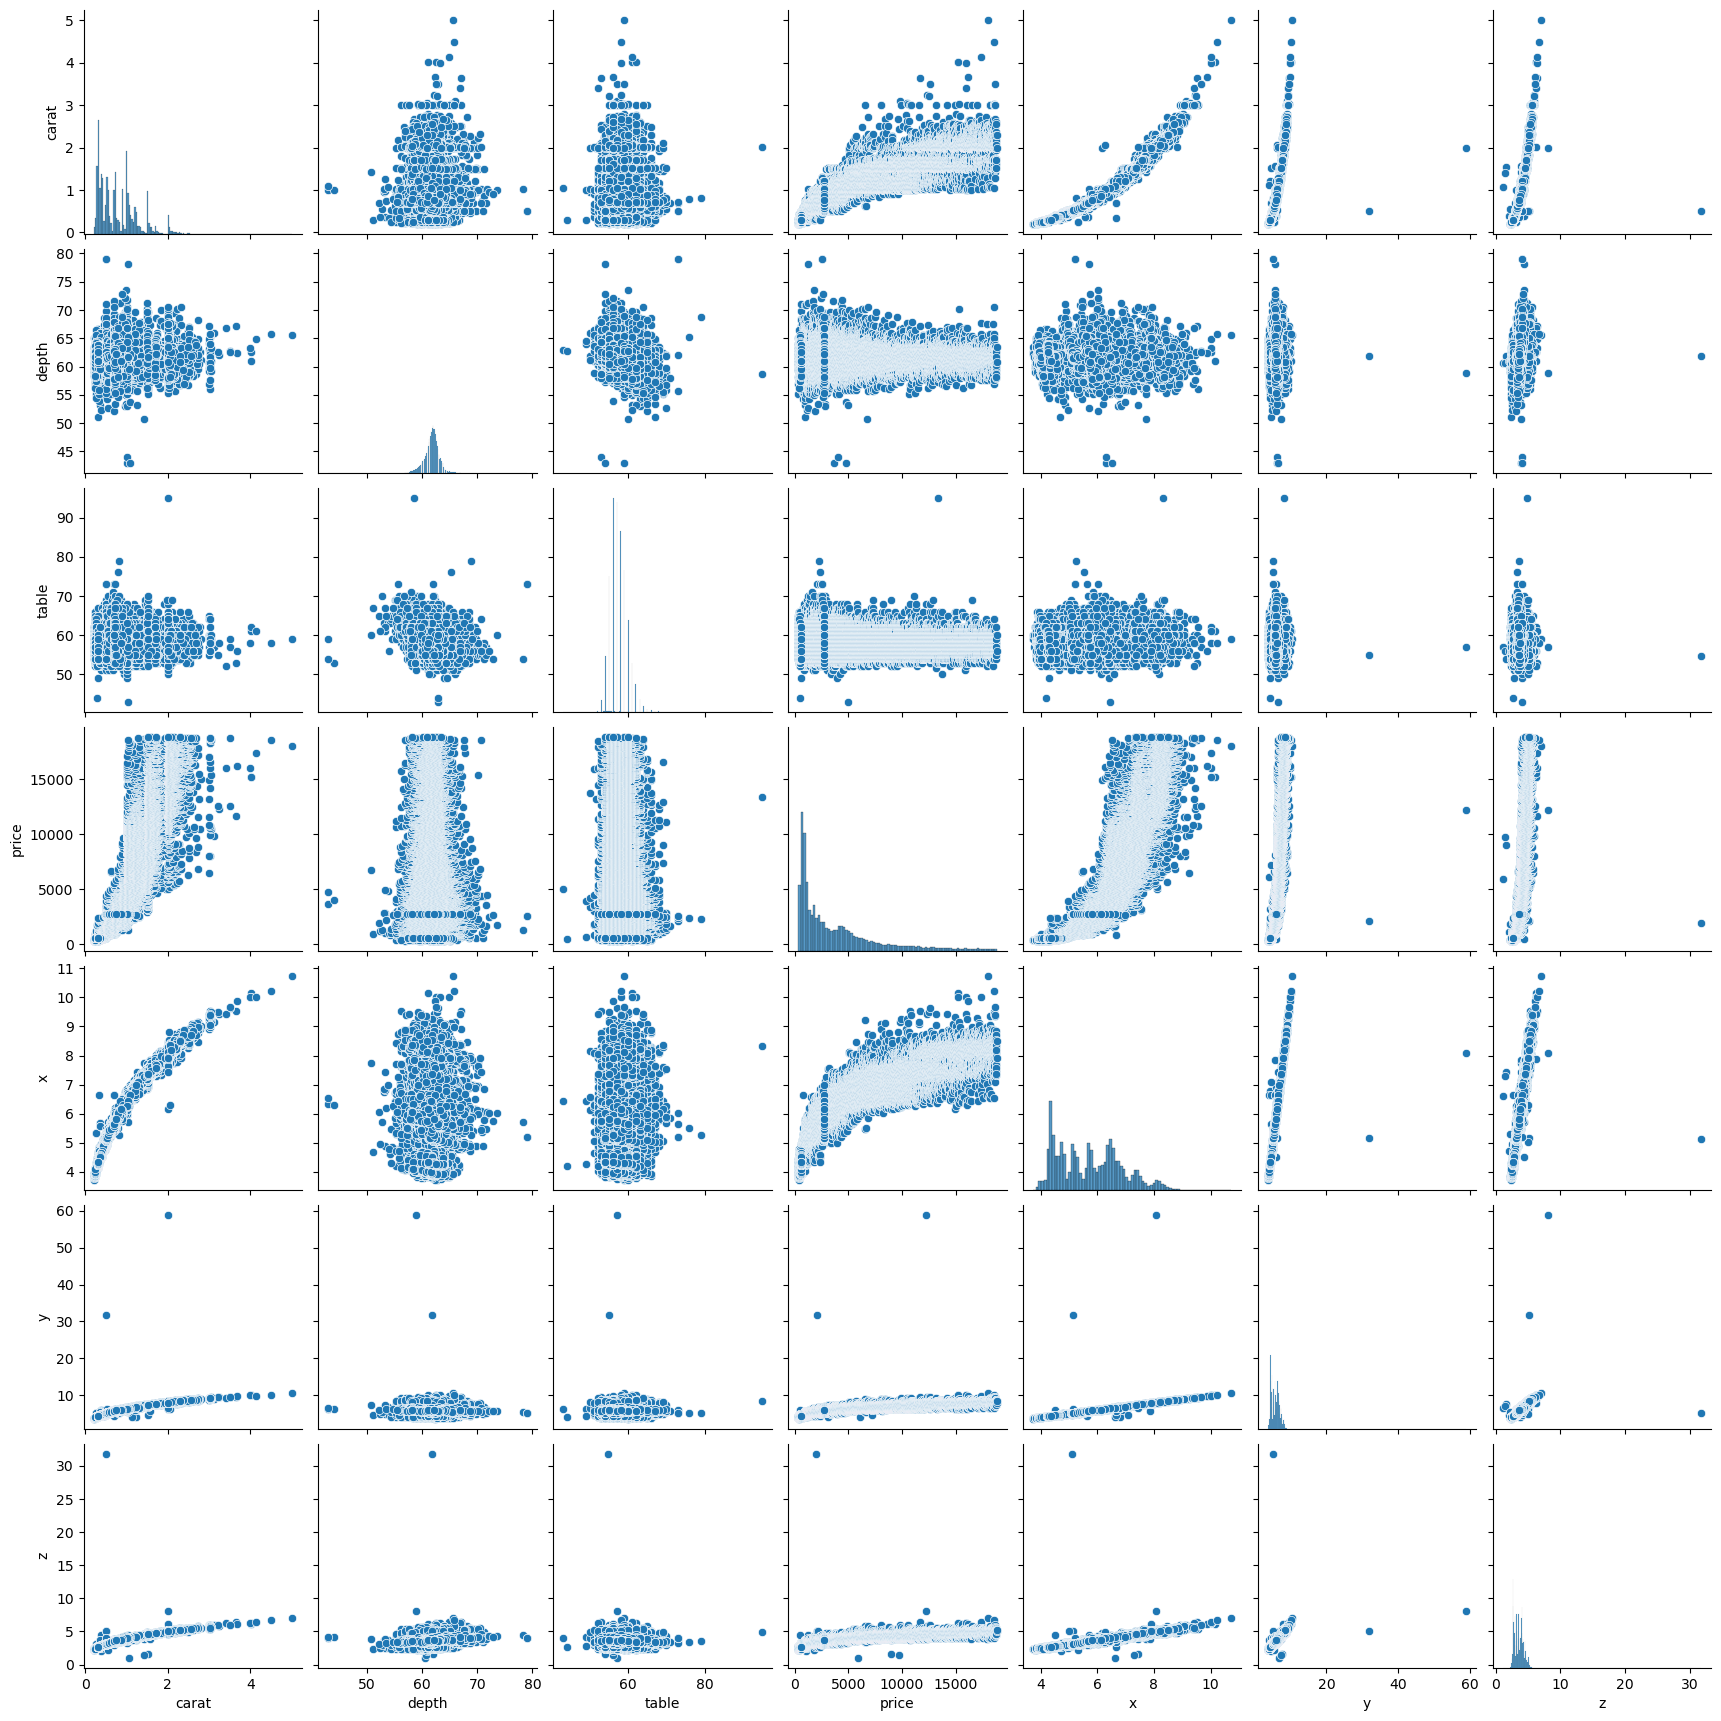

In [13]:
## değişkenler arasındaki ilişki görselleştirmesi

sns.pairplot(df)
plt.show()

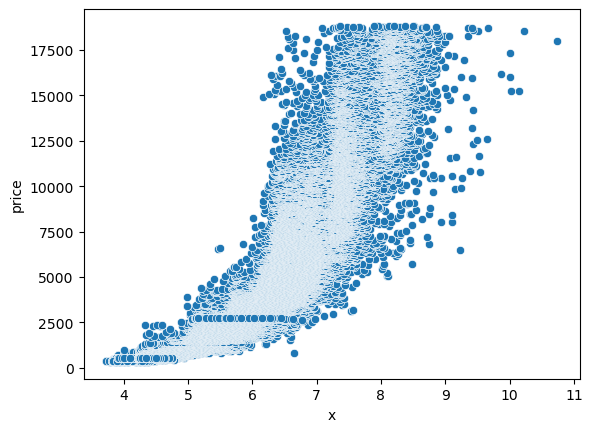

In [14]:
## price ve x değişkeni arasındki ilişkinin görselleştirilmesi

sns.scatterplot(x=df["x"], y = df["price"])
plt.show()

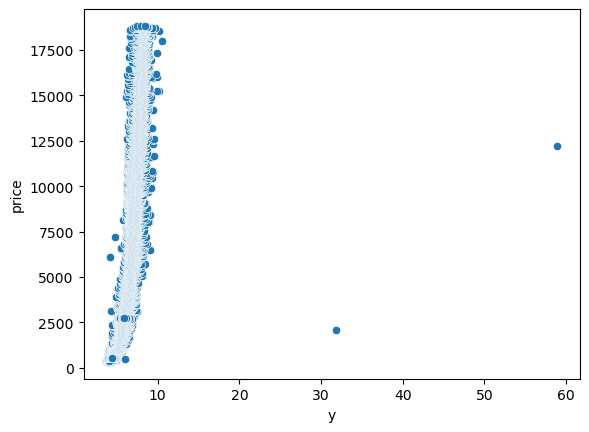

In [15]:
## ## price ve y değişkeni arasındki ilişkinin görselleştirilmesi

sns.scatterplot(x=df["y"], y = df["price"])
plt.show()

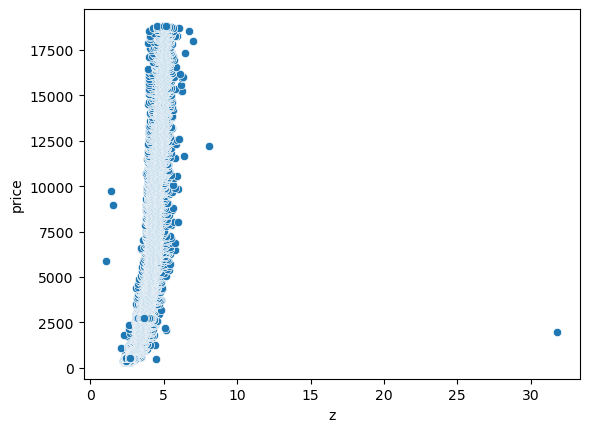

In [16]:
##  price ve z değişkeni arasındki ilişkinin görselleştirilmesi

sns.scatterplot(x=df["z"], y = df["price"])
plt.show()

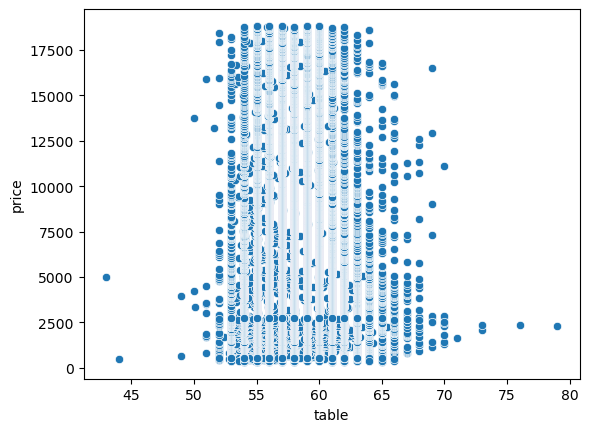

In [36]:
##  price ve table değişkeni arasındki ilişkinin görselleştirilmesi

sns.scatterplot(x=df["table"], y = df["price"])
plt.show()

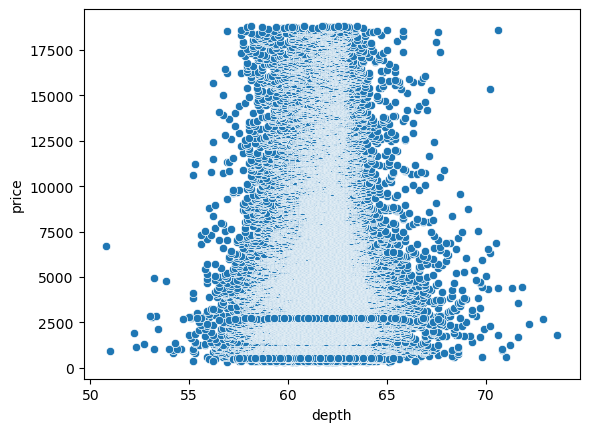

In [37]:
## price ve depth değişkeni arasındki ilişkinin görselleştirilmesi

sns.scatterplot(x=df["depth"], y = df["price"])
plt.show()

In [38]:
## çoklu lineer regresyon grafikleri

def multi_lm_plots(df):
    variables = ['x', 'y', 'z', 'depth', 'table']
    scatter_colors = ["#BC8F8F", "#8FBC8F", "#FFD700", "#87CEFA", "#FFB6C1"]
    line_colors = ["#8B4513", "#006400", "#B8860B", "#00008B", "#C71585"]

    for i, var in enumerate(variables):
        lm = sns.lmplot(
            x="price", y=var, data=df,
            scatter_kws={"color": scatter_colors[i]},
            line_kws={"color": line_colors[i]},
            height=5, aspect=1.2
        )
        plt.title(f"Line Plot on Price vs '{var.capitalize()}'", color="#774571", fontsize=20)
        plt.show()

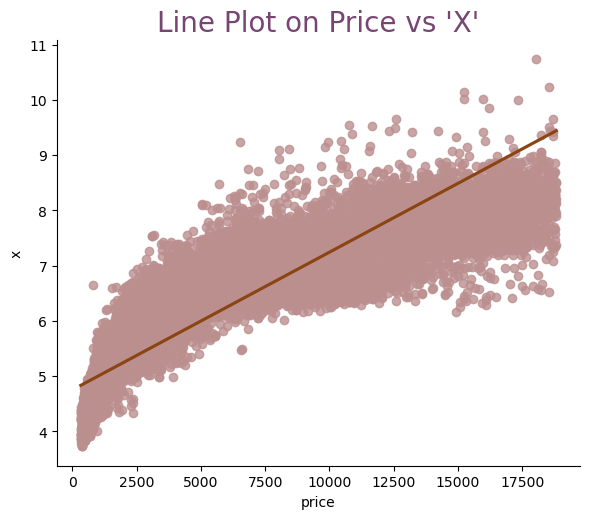

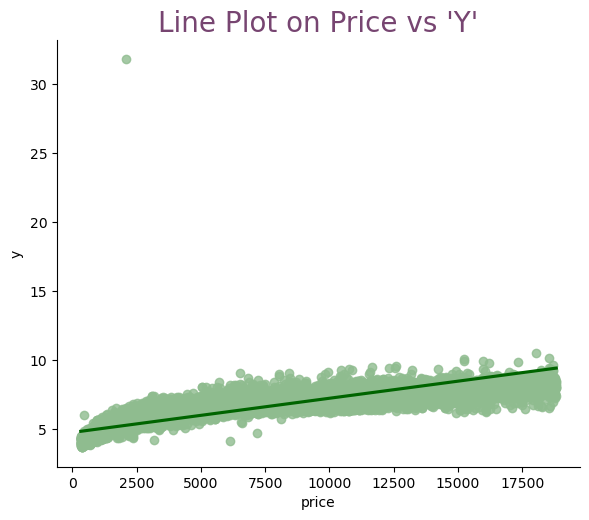

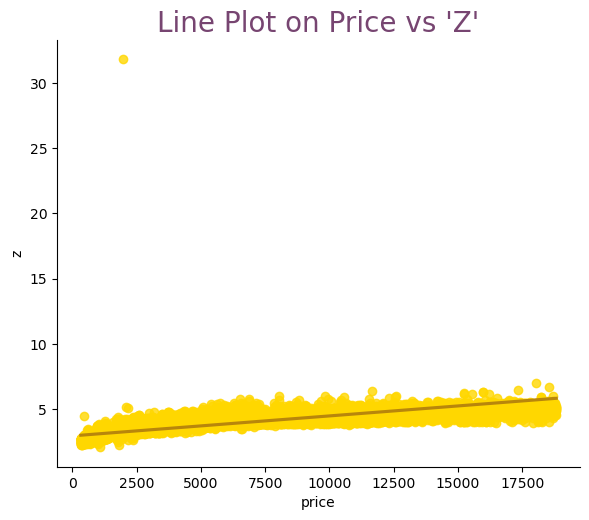

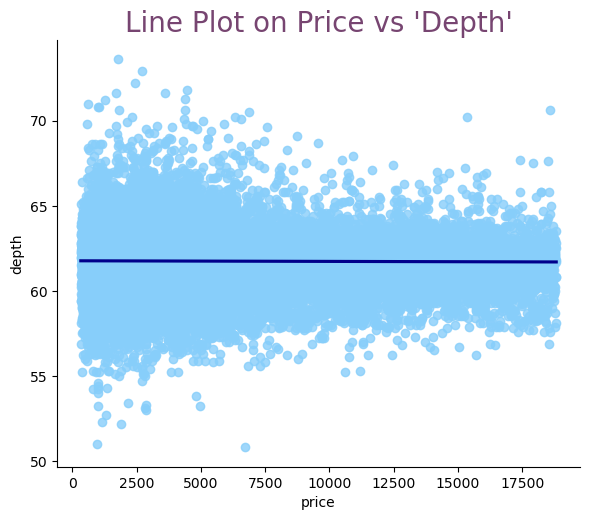

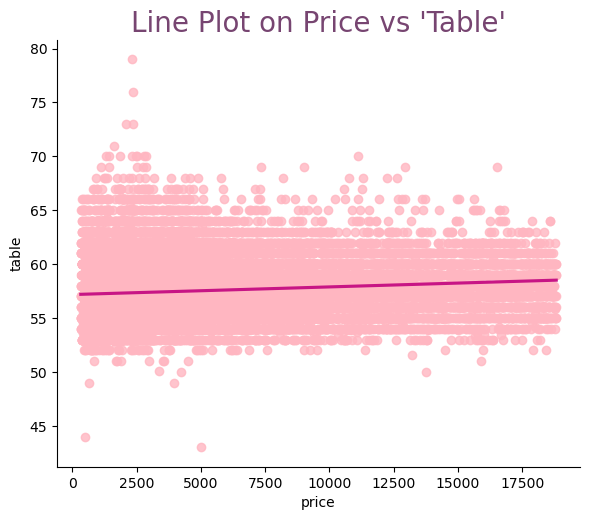

In [39]:
multi_lm_plots(df)

In [40]:
## veri temizliği ve aykırı değer filtreleme

df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<40)]
df = df[(df["y"]<40)]
df = df[(df["z"]<40)&(df["z"]>2)]
df.shape 

(53909, 10)

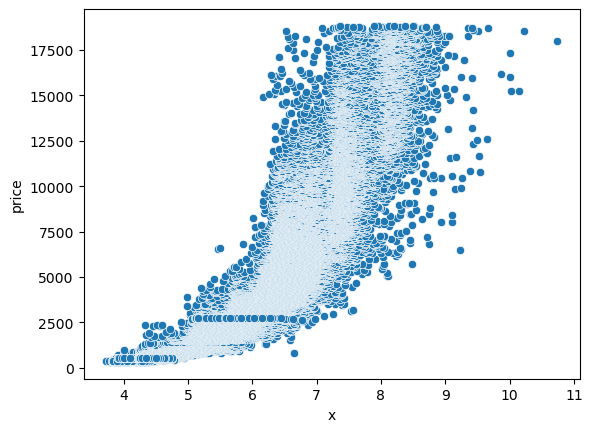

In [41]:
## aykırı değerler temizlendikten sonra price ve x değişkeni arasındki ilişkinin görselleştirilmesi

sns.scatterplot(x=df["x"], y = df["price"])
plt.show()

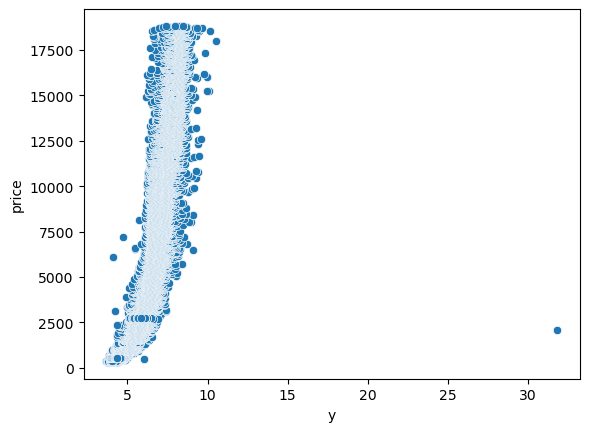

In [42]:
## aykırı değerler temizlendikten sonra price ve y değişkeni arasındki ilişkinin görselleştirilmesi

sns.scatterplot(x=df["y"], y = df["price"])
plt.show()

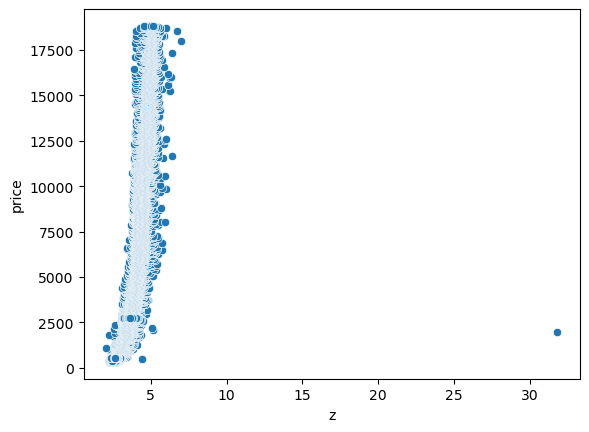

In [43]:
## aykırı değerler temizlendikten sonra price ve z değişkeni arasındki ilişkinin görselleştirilmesi

sns.scatterplot(x=df["z"], y = df["price"])
plt.show()

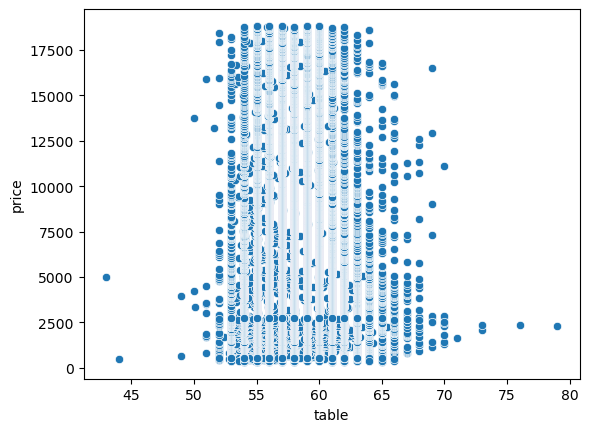

In [44]:
## aykırı değerler temizlendikten sonra price ve table değişkeni arasındki ilişkinin görselleştirilmesi

sns.scatterplot(x=df["table"], y = df["price"])
plt.show()

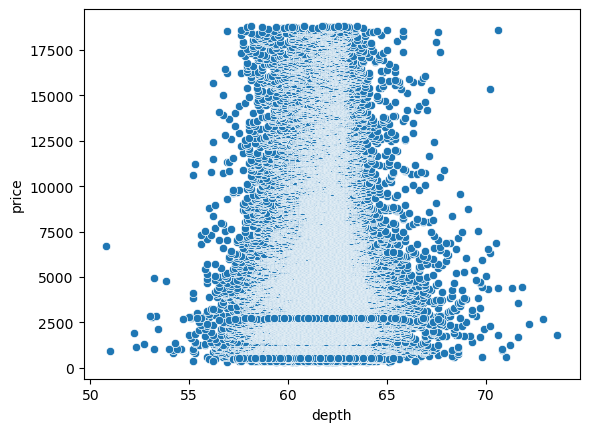

In [45]:
## aykırı değerler temizlendikten sonra price ve depth değişkeni arasındki ilişkinin görselleştirilmesi

sns.scatterplot(x=df["depth"], y = df["price"])
plt.show()

In [46]:
## aykırı değerler temizlendikten sonraki çoklu doğrusal regresyon grafikleri

def multi_lm_plots(df):
    variables = ['x', 'y', 'z', 'depth', 'table']
    scatter_colors = ["#BC8F8F", "#8FBC8F", "#FFD700", "#87CEFA", "#FFB6C1"]
    line_colors = ["#8B4513", "#006400", "#B8860B", "#00008B", "#C71585"]

    for i, var in enumerate(variables):
        lm = sns.lmplot(
            x="price", y=var, data=df,
            scatter_kws={"color": scatter_colors[i]},
            line_kws={"color": line_colors[i]},
            height=5, aspect=1.2
        )
        plt.title(f"Line Plot on Price vs '{var.capitalize()}'", color="#999999", fontsize=20)
        plt.show()

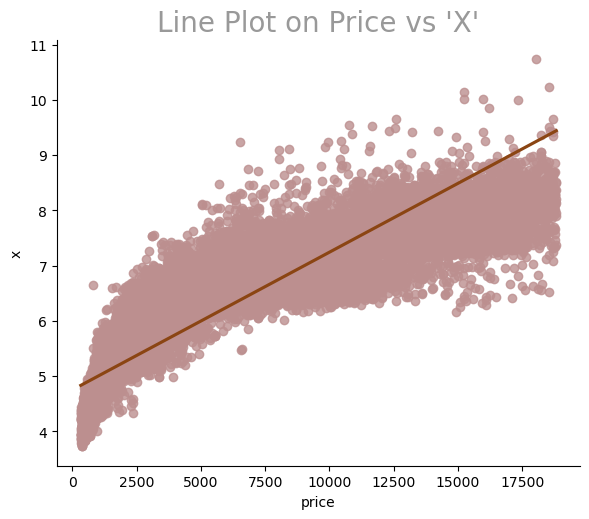

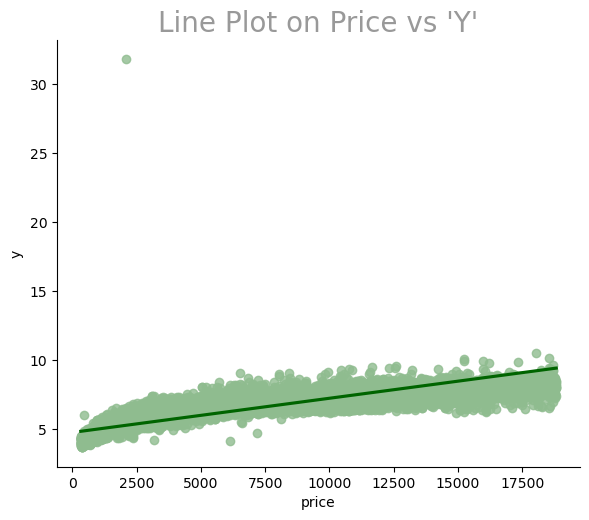

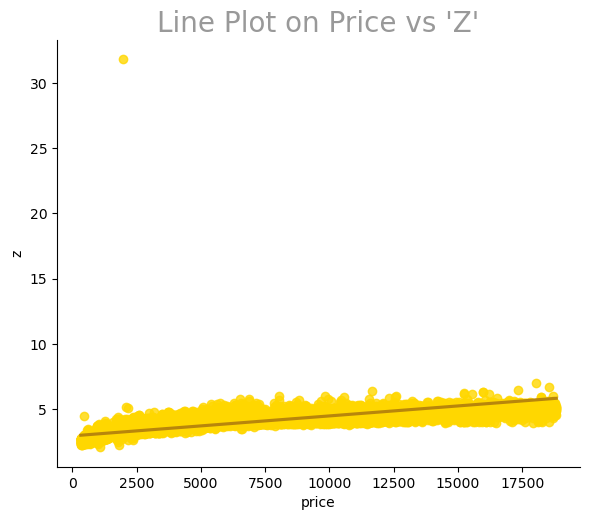

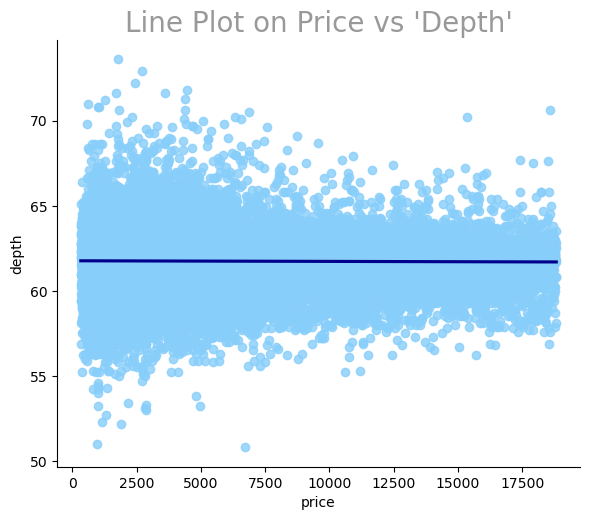

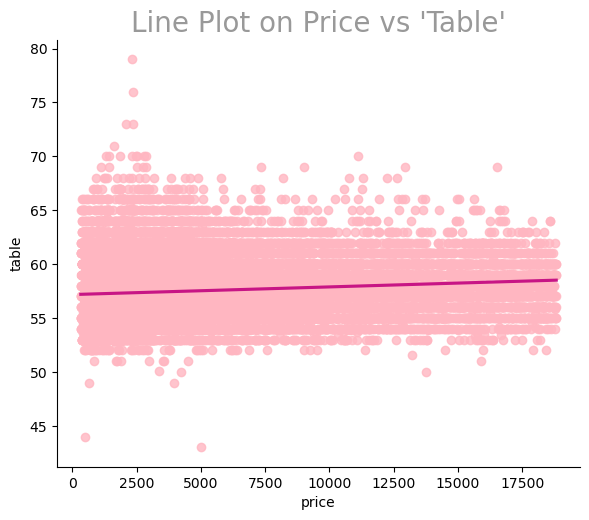

In [47]:
multi_lm_plots(df)

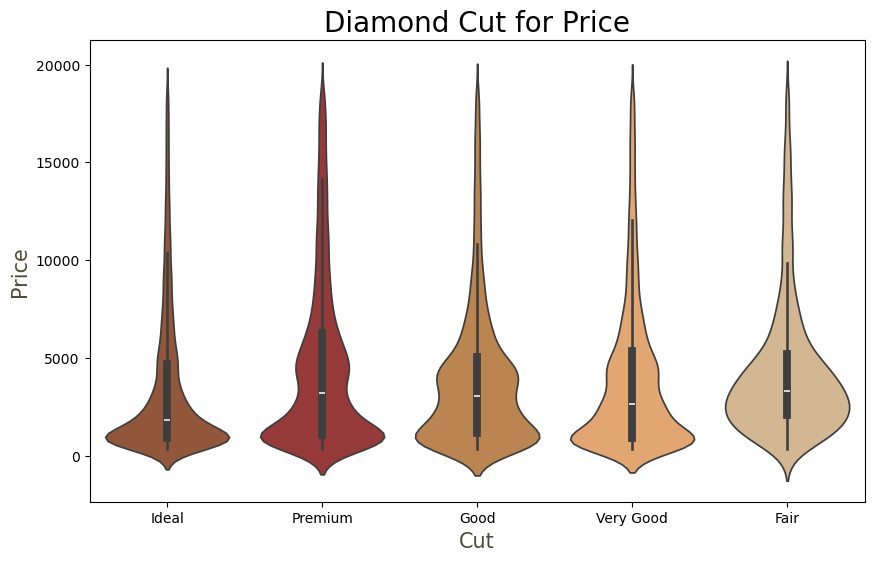

In [48]:
## elmas kesim kalite-fiyat ilişkisi keman grafiği

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10,6))
cols = ["#A0522D","#A52A2A","#CD853F","#F4A460","#DEB887"]
ax = sns.violinplot(x="cut",y="price", data=df, palette=cols,scale= "count")
ax.set_title("Diamond Cut for Price", color="#000000", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Cut", color="#4e4c39", fontsize = 15)
plt.show()

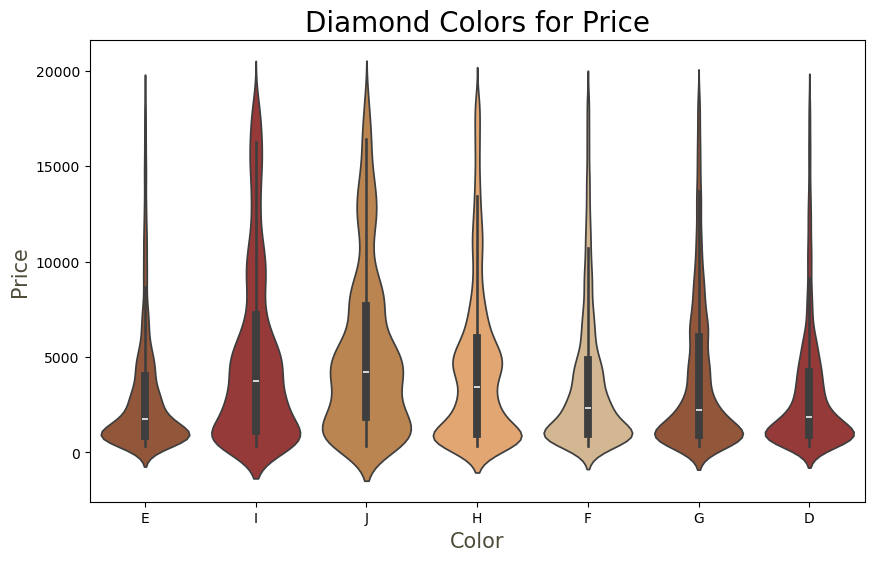

In [49]:
## elmas rengi-fiyat ilişkisi keman grafiği

plt.figure(figsize=(10,6))
ax = sns.violinplot(x="color",y="price", data=df, palette=cols,scale= "count")
ax.set_title("Diamond Colors for Price", color="#000000", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Color", color="#4e4c39", fontsize = 15)
plt.show()

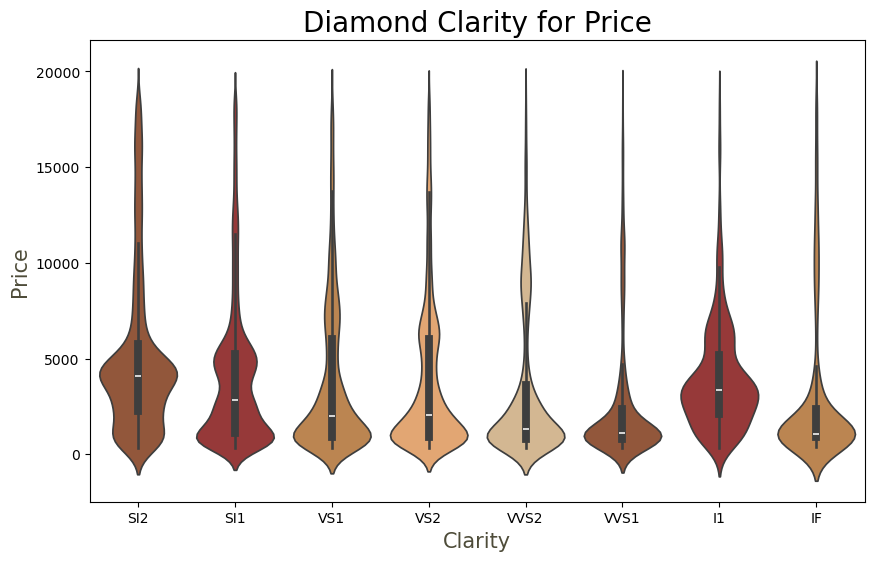

In [50]:
## elmas berraklığı-fiyat ilişkisi keman grafiği

plt.figure(figsize=(10,6))
ax = sns.violinplot(x="clarity",y="price", data=df, palette=cols,scale= "count")
ax.set_title("Diamond Clarity for Price", color="#000000", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Clarity", color="#4e4c39", fontsize = 15)
plt.show()

In [51]:
X.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [52]:
df["cut"].value_counts()

cut
Ideal        21544
Premium      13779
Very Good    12081
Good          4902
Fair          1603
Name: count, dtype: int64

In [53]:
df["clarity"].value_counts()

clarity
SI1     13059
VS2     12250
SI2      9184
VS1      8169
VVS2     5066
VVS1     3654
IF       1790
I1        737
Name: count, dtype: int64

In [55]:
## label encoder

from sklearn.preprocessing import LabelEncoder

df1 = df.copy()


columns = ['cut','color','clarity']
label_encoder = LabelEncoder()
for col in columns:
    df1[col] = label_encoder.fit_transform(df[col])
df1.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000,53909.000000
mean,0.797617,2.553396,2.593964,3.835575,61.749743,57.455852,3930.513680,5.731441,5.733764,3.539994
std,0.473759,1.027444,1.701283,1.724540,1.420093,2.226169,3987.145802,1.119369,1.116891,0.702085
min,0.200000,0.000000,0.000000,0.000000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,73.600000,79.000000,18823.000000,10.740000,31.800000,31.800000


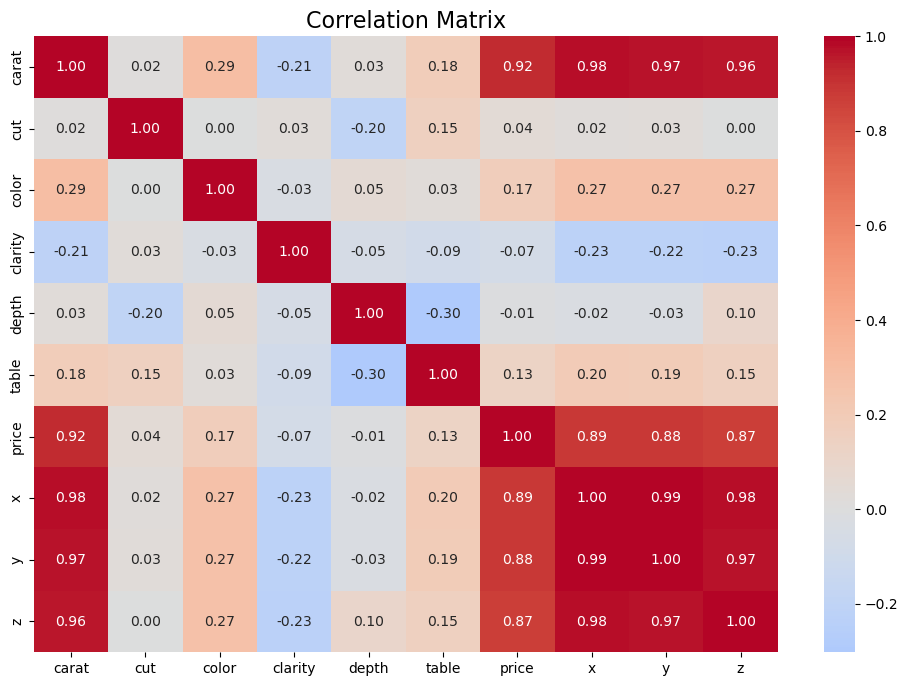

In [56]:
## heatmap visualization

corrmat = df1.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corrmat, cmap='coolwarm', annot=True, fmt=".2f", center=0)
plt.title("Correlation Matrix", fontsize=16)
plt.show()


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [58]:
## train-test split

X = df1.drop(["price"], axis=1)  
y = df1["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=25)

In [59]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
11575,1.02,4,2,2,62.1,63.0,6.48,6.36,3.99
20626,1.31,2,3,5,61.9,56.0,7.05,7.08,4.37
30636,0.30,2,3,6,62.0,54.9,4.30,4.33,2.68
19532,1.50,1,4,5,63.9,59.0,7.25,7.18,4.61
16669,1.01,2,3,5,60.9,57.0,6.48,6.51,3.95


In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43127 entries, 11575 to 29853
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43127 non-null  float64
 1   cut      43127 non-null  int32  
 2   color    43127 non-null  int32  
 3   clarity  43127 non-null  int32  
 4   depth    43127 non-null  float64
 5   table    43127 non-null  float64
 6   x        43127 non-null  float64
 7   y        43127 non-null  float64
 8   z        43127 non-null  float64
dtypes: float64(6), int32(3)
memory usage: 2.8 MB


In [61]:
X_train.describe()

,carat,cut,color,clarity,depth,table,x,y,z
count,43127.000000,43127.000000,43127.000000,43127.000000,43127.000000,43127.000000,43127.000000,43127.000000,43127.000000
mean,0.796802,2.549911,2.593735,3.835463,61.747854,57.450560,5.730150,5.732647,3.539244
std,0.472821,1.027610,1.699132,1.727563,1.418192,2.231258,1.117912,1.116927,0.703800
min,0.200000,0.000000,0.000000,0.000000,50.800000,43.000000,3.730000,3.680000,2.060000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,5.700000,5.710000,3.520000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,6.540000,6.540000,4.030000
max,4.500000,4.000000,6.000000,7.000000,73.600000,79.000000,10.230000,31.800000,31.800000


In [62]:
X_train["cut"].value_counts()

cut
2    17338
3    10934
4     9642
1     3924
0     1289
Name: count, dtype: int64

In [63]:
X_train["color"].value_counts()

color
3    9000
1    7850
2    7655
4    6686
0    5392
5    4308
6    2236
Name: count, dtype: int64

In [64]:
X_train["clarity"].value_counts()

clarity
2    10472
5     9785
3     7286
4     6528
7     4056
6     2956
1     1445
0      599
Name: count, dtype: int64

In [82]:
## çoklu machine learning pipelines'ları oluşturmak
pipeline_lr = Pipeline([("scalar1", StandardScaler()),
                        ("lr", LinearRegression())])
pipeline_lasso = Pipeline([("scalar2", StandardScaler()),
                           ("lasso", Lasso())])
pipeline_dt = Pipeline([("scalar3", StandardScaler()),
                        ("dt", DecisionTreeRegressor())])
pipeline_rf = Pipeline([("scalar4", StandardScaler()),
                        ("rf", RandomForestRegressor())])
pipeline_kn = Pipeline([("scalar5", StandardScaler()),
                        ("kn", KNeighborsRegressor())])
pipeline_xgb = Pipeline([("scalar6", StandardScaler()),
                         ("xgb", XGBRegressor())])

# Pipeline listesi ve isimleri
pipelines = [pipeline_lr, pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]
model_names = ["LinearRegression", "Lasso", "DecisionTree", "RandomForest", "KNeighbors", "XGBRegressor"]

# Modelleri fit et ve CV hesapla
cv_results_rms = []
cv_results_r2 = []

for i, pipe in enumerate(pipelines):
    pipe.fit(X_train, y_train)
    
    # RMSE
    cv_score_rmse = cross_val_score(pipe, X_train, y_train, scoring="neg_root_mean_squared_error", cv=12)
    cv_results_rms.append(cv_score_rmse)
    print(f"{model_names[i]} RMSE: {-cv_score_rmse.mean():.3f}")
    
    # R2
    cv_score_r2 = cross_val_score(pipe, X_train, y_train, scoring="r2", cv=12)
    cv_results_r2.append(cv_score_r2.mean())
    print(f"{model_names[i]} R²: {cv_score_r2.mean():.4f}\n")

# En iyi model (R²'ye göre)
best_index = np.argmax(cv_results_r2)
best_model = pipelines[best_index]
best_model_name = model_names[best_index]
print(f"En iyi model: {best_model_name} (R² = {cv_results_r2[best_index]:.4f})")

# Test setinde tahmin ve skor
y_pred = best_model.predict(X_test)
r2 = metrics.r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(f"Test Setinde R²: {r2:.4f}")
print(f"Test Setinde Adjusted R²: {adj_r2:.4f}")


LinearRegression RMSE: 1383.854
LinearRegression R²: 0.8783

Lasso RMSE: 1366.991
Lasso R²: 0.8816

DecisionTree RMSE: 736.502
DecisionTree R²: 0.9650

RandomForest RMSE: 548.844
RandomForest R²: 0.9809

KNeighbors RMSE: 816.559
KNeighbors R²: 0.9578

XGBRegressor RMSE: 548.347
XGBRegressor R²: 0.9810

En iyi model: XGBRegressor (R² = 0.9810)
Test Setinde R²: 0.9821
Test Setinde Adjusted R²: 0.9821


In [88]:
import os
import joblib

# Model klasörünü oluştur (yoksa)
os.makedirs("model", exist_ok=True)

# En iyi modeli güvenli şekilde kaydet
model_info = {
    "model_params": best_model.get_params(),
    "trained_model": best_model,
    "feature_names": X_train.columns.tolist()
}

joblib.dump(model_info, "model/diamond_model_safe.pkl")
print("Model güvenli formatta kaydedildi.")


Model güvenli formatta kaydedildi.
